Chapter 02

# 回归分析
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf
import statsmodels.api as sm

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

## 下载、处理数据

In [3]:
y_x_df = yf.download(['AAPL','^GSPC'], start='2020-01-01', end='2020-12-31')
y_x_df = y_x_df['Adj Close'].pct_change()
y_x_df.dropna(inplace = True)

y_x_df.rename(columns={"^GSPC": "SP500"},inplace = True)
y_x_df.to_pickle('y_x_df.pkl')
# 如果不能下载数据，请用pandas.read_pickle() 从配套文件读入数据
x_df = y_x_df[['SP500']]
y_df = y_x_df[['AAPL']]

[*********************100%%**********************]  2 of 2 completed


## 线性回归

In [4]:
# add a column of ones
X_df = sm.add_constant(x_df)

model = sm.OLS(y_df, X_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     550.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           5.16e-65
Time:                        07:28:57   Log-Likelihood:                 675.37
No. Observations:                 251   AIC:                            -1347.
Df Residuals:                     249   BIC:                            -1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      1.819      0.0

In [5]:
model_params = model.fit().params

x_mean = x_df.mean().values
y_mean = y_df.mean().values

n = len(y_df)

In [6]:
# predicted
y_hat = results.fittedvalues

y_hat = y_hat.to_frame()
y_hat = y_hat.rename(columns={0: 'AAPL'})

In [7]:
DFR = 1

In [8]:
# Sum of Squares for Error, SSE
SSE = ((y_df - y_hat)**2).sum()

In [9]:
# degrees of freedom for error, DFE
DFE = n - DFR - 1

In [10]:
# mean squared error, MSE
# MSE = SSE/DFE
# MSE = MSE.values

## t-test

In [11]:
MSE = SSE/DFE
MSE = MSE.values
# 计算MSE

b1 = model_params.SP500
# 斜率系数

SSD_x = np.sum((x_df.values - x_mean)**2)

SE_b1 = np.sqrt(MSE/SSD_x)
# 标准误

T_b1 = (b1 - 0)/SE_b1
# b1的t检验统计量
print(T_b1)

[23.46167122]


In [12]:
b0 = model_params.const
# 截距系数

SE_b0 = np.sqrt(MSE*(1/n + x_mean**2/SSD_x))
# 标准误

T_b0 = (b0 - 0)/SE_b0
# b0的t检验统计量

print(T_b0)

[1.81883761]


In [13]:
from scipy import stats

pval_b1 = stats.t.sf(np.abs(T_b1), n-2)*2
print(pval_b1)
pval_b0 = stats.t.sf(np.abs(T_b0), n-2)*2
print(pval_b0)

[5.1637086e-65]
[0.0701374]


## confidence intervals of coefficients

In [14]:
alpha = 0.05
# 显著水平
t_95 = stats.t.ppf(1 - alpha/2, DFE) 
# t值

# 系数b1的1 – α 置信区间
b1_upper_95 = b1 + t_95*SE_b1
print(b1_upper_95)
b1_lower_95 = b1 - t_95*SE_b1
print(b1_lower_95)

# 系数b0的1 – α 置信区间
b0_upper_95 = b0 + t_95*SE_b0
print(b0_upper_95)
b0_lower_95 = b0 - t_95*SE_b0
print(b0_lower_95)

[1.2176517]
[1.02904801]
[0.0039431]
[-0.00015685]


## 可视化

In [15]:
# generate x-values for regression line
x_i = np.linspace(-0.15,0.15,50)

# predicted values
y_i = b0 + b1* x_i

alpha = 0.05
t_95 = stats.t.ppf(1 - alpha/2, DFE) 

CI_95 = t_95 * np.sqrt(MSE) * np.sqrt(1/n + (x_i - x_mean)**2 / np.sum((x_df.values - x_mean)**2))

CI_upper_95 = y_i + CI_95
CI_lower_95 = y_i - CI_95

In [16]:
alpha = 0.01
t_99 = stats.t.ppf(1 - alpha/2, DFE) 

CI_99 = t_99 * np.sqrt(MSE) * np.sqrt(1/n + (x_i - x_mean)**2 / np.sum((x_df.values - x_mean)**2))

CI_upper_99 = y_i + CI_99
CI_lower_99 = y_i - CI_99

(-0.15, 0.15)

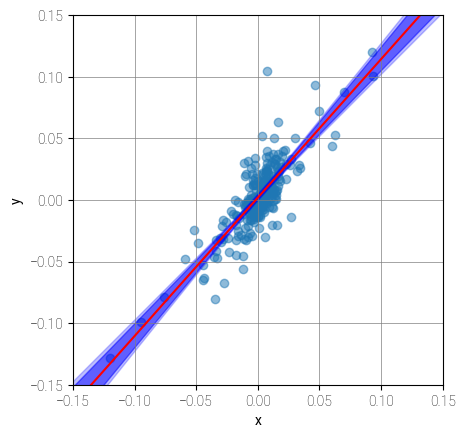

In [17]:
# confidence band
fig, ax = plt.subplots()
plt.scatter(x_df, y_df, alpha = 0.5)

plt.plot(x_i, y_i,color = 'r')

# plot confidence interval
ax.fill_between(x_i,CI_lower_95, CI_upper_95, color = 'b', alpha = 0.5)
ax.fill_between(x_i,CI_lower_99, CI_upper_99, color = 'b', alpha = 0.25)

plt.axis('scaled')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])

In [18]:
y_x_df.head()

,AAPL,SP500
Date,,
2020-01-03,-0.009722,-0.007060
2020-01-06,0.007968,0.003533
2020-01-07,-0.004703,-0.002803
2020-01-08,0.016086,0.004902
2020-01-09,0.021241,0.006655


(-0.13052396701224492,
 0.10451115437058604,
 -0.15820923621203722,
 0.13304707646682348)

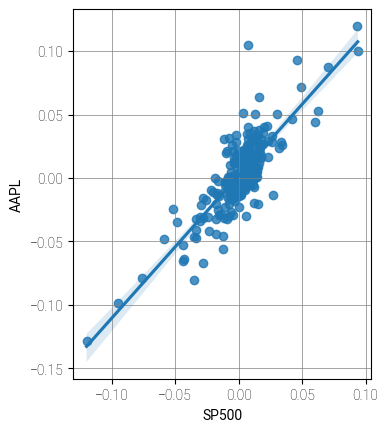

In [19]:
# linear regression with confidence interval, Seaborn

sns.regplot(y_x_df, x = 'SP500', y = 'AAPL', ci=95)
plt.axis('scaled')

(-0.13052396701224492,
 0.10451115437058604,
 -0.16235468050658938,
 0.1348652649958163)

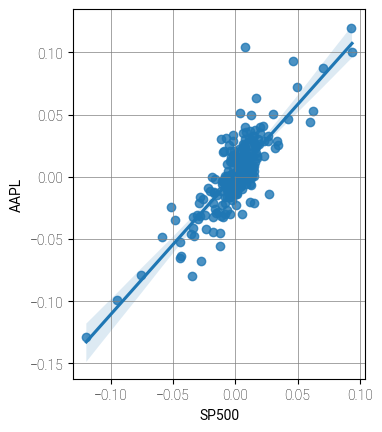

In [20]:
sns.regplot(y_x_df, x = 'SP500', y = 'AAPL', ci=99)
plt.axis('scaled')

In [21]:
alpha = 0.05
t_95 = stats.t.ppf(1 - alpha/2, DFE) 

pi_95 = t_95 * np.sqrt(MSE) * np.sqrt(1 + 1/n + (x_i - x_mean)**2 / np.sum((x_df.values - x_mean)**2))

pi_upper_95 = y_i + pi_95
pi_lower_95 = y_i - pi_95

alpha = 0.01
t_99 = stats.t.ppf(1 - alpha/2, DFE) 

pi_99 = t_99 * np.sqrt(MSE) * np.sqrt(1 + 1/n + (x_i - x_mean)**2 / np.sum((x_df.values - x_mean)**2))

pi_upper_99 = y_i + pi_99
pi_lower_99 = y_i - pi_99

## plot predicting interval

(-0.15, 0.15)

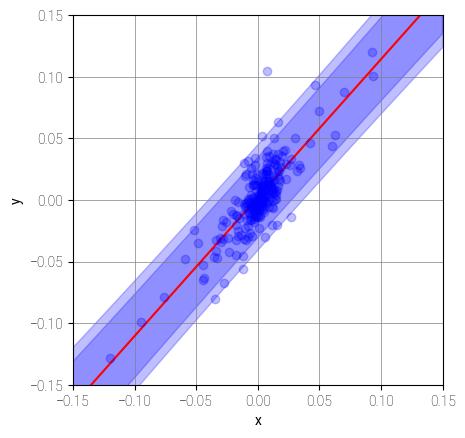

In [22]:
fig, ax = plt.subplots()
plt.scatter(x_df,y_df, zorder = 10, 
            color = 'b', alpha = 0.25); 

plt.plot(x_i, y_i,color = 'r')


ax.fill_between(x_i,pi_lower_95, pi_upper_95, color = 'b', alpha = 0.25)
ax.fill_between(x_i,pi_lower_99, pi_upper_99, color = 'b', alpha = 0.25)

plt.axis('scaled')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])

## Log-Likelihood Function

In [23]:
# SSE = SSE.values
s2 = SSE / n

# maximum likelihood estimator of error variance
# Log Likelihood function
log_L = n*(-np.log(np.sqrt(s2*2*np.pi))) - n/2
print(log_L)

AAPL    675.366503
dtype: float64


In [24]:
AIC = 2*(DFR + 1) - 2*log_L
print(AIC)
BIC = (DFR + 1)*np.log(n) - 2*log_L
print(BIC)

AAPL   -1346.733006
dtype: float64
AAPL   -1339.682101
dtype: float64


## Residual analysis

In [25]:
e_df = y_df - y_hat;

(-0.15, 0.15)

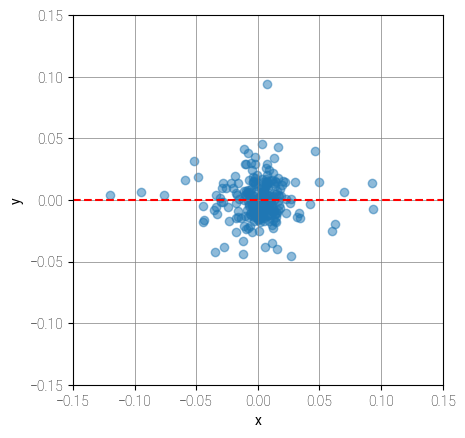

In [26]:
# confidence band
fig, ax = plt.subplots()
plt.scatter(x_df,e_df, alpha = 0.5); 
plt.axhline(y=0, color='r', linestyle='--')
plt.axis('scaled')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])

In [27]:
# skewness
S = np.mean(e_df**3)/np.mean(e_df**2)**(3/2)
print(S)
S_2 = stats.skew(e_df,bias = True)
print(S_2)

AAPL    0.7719
dtype: float64
[0.77189976]


C:\Users\james\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\james\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## kurtosis

In [28]:
K = np.mean(e_df**4)/np.mean(e_df**2)**(4/2)
print(K)
K_2 = stats.kurtosis(e_df,fisher=False,bias = True)
print(K_2)

AAPL    7.215717
dtype: float64
[7.21571709]


C:\Users\james\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\james\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Omnibus test for normality

In [29]:
(Omnibus_test, p) = stats.normaltest(e_df)
print(Omnibus_test)

[52.10899919]


C:\Users\james\AppData\Local\Temp\ipykernel_15768\2583923896.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_df)


<AxesSubplot:ylabel='Density'>

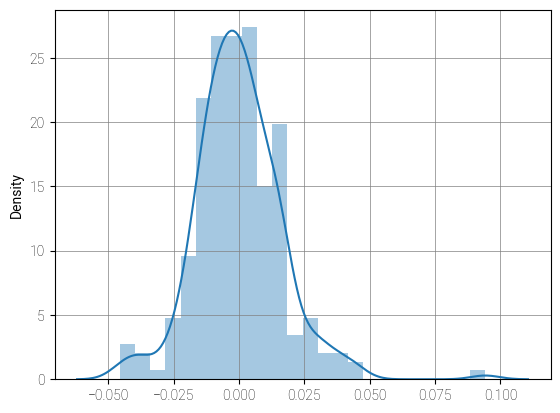

In [30]:
fig, ax = plt.subplots()
sns.distplot(e_df)

## Jarque-Bera test

In [31]:
JB = (n/6.0) * ( S**2.0 + (1.0/4.0)*( K - 3.0 )**2.0 )
print(JB)
p_JB = 1.0 - stats.chi2(2).cdf(JB)
print(p_JB)

AAPL    210.793853
dtype: float64
[0.]


## Autocorrelation 

In [32]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

## Durbin-Watson test

In [33]:
DW = np.sum(np.diff(e_df['AAPL'].values)**2)/SSE
print(DW)

AAPL    1.871483
dtype: float64


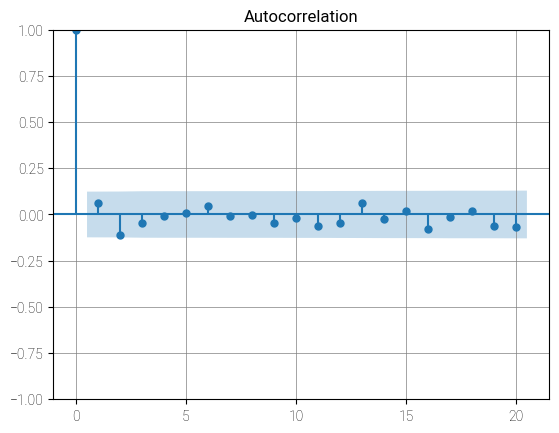

In [34]:
plot_acf(e_df, lags=20)
pyplot.show()

## Condition number, multicollinearity

In [35]:
X = np.matrix(X_df)
eigen_values, V = np.linalg.eig(X.T * X)
print(eigen_values)

condition_number = np.sqrt(eigen_values.max()/eigen_values.min())
print(condition_number)

[2.51000153e+02 1.18460204e-01]
46.03103654981152
